# Practical Statistics for Data Science

## Cap 1 Analisis Exploratorio de los Datos

### Estimacion de Ubicacion (Tendencia Central)

- La Media es el valor promedio. The mean is the sum of all values divided by the number of values

- La Media recortada (trimmed mean) eliminates the influence of extreme values. You calculate by dropping a fixed number of sorted values at each end and then taking an average of the remmainig value. 

- La Media ponderada (weighted mean) which you calculate by multiplying each data value by a user-specific weight and dividing their sum of the weights. Main motivations for using a weighted mean:

    - Some values are intrinsically more variable than others.
    - The data collected does not equally represent the difference groups that we are interested in measuring 

- La Mediana (median) is robust to outliers. Since the mean is much more sensitive to the data, there are many instances in which the median is a better metric for location 

- Outlier is any value that is very distant from the other values in a data set. Outlier should be identified and are usually worthy of further investigation

- The trimmed mean is widely used to avoid  the influence of outliers

#### Ejemplo: Estimaciones de ubicacion de poblacion y tasa de homicidios 

In [1]:
import pandas as pd
import numpy as np

In [2]:
state = pd.read_csv('./data/state.csv') 
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [3]:
#mean
state['Population'].mean()

6162876.3

In [4]:
#trimmed mean
from scipy.stats import trim_mean
trim_mean(state['Population'], 0.1)

4783697.125

In [5]:
#median
state['Population'].median()

4436369.5

The mean is bigger than the trimmed mean, which is bigger than the median. This is because the trimmed mean excludes the largest and five states (trim=0.1 drops 10% from each end)

Calculate the average murder rate for the country, we need to used a weighted mean or median to account for different populations in the states

In [6]:
#weighted mean
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [7]:
#weighted median
import wquantiles

wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

the weighted mean and the weighted median are about the same

### Estimate of Variability

Calculemos la Desviacion estandar, el rango intercuartil y la MAD para estimar la variabilidad de la poblacion de los estado

In [8]:
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [9]:
#Standar Deviation
state['Population'].std()

6848235.347401142

In [10]:
#IQR
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) 

4847308.0

In [11]:
#MAD
from statsmodels import robust
robust.scale.mad(state['Population'])

3849876.1459979336

La Desviacion Estandar es casi el doble de la MAD lo que indica que la Desviacion es sensible a outliers.

### Explorando la distribucion de los datos

muestra algunos percentiles de la tasa de homicidios por estado.

In [12]:
state['Murder.Rate'].quantile([0.05,0.25,0.50,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

La mediana es de 4 asesinatos por cada 100000 habitantes. El percentil 0.05 es de 1.6 y el percentil de 0.95 es de 6.51

Muestra el Diagrama de Caja de las poblaciones estatales

Text(0, 0.5, 'Population (millions)')

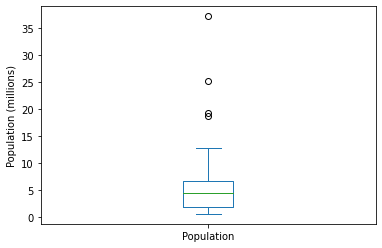

In [13]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

El grafico muestra que la poblacion estatal promedio es de aproximadamente 5 millones. La mitad de los estados se encuentran entre 2 y 7 millones. La parte superior e inferior de la caja son el 25 y 75 percentiles respectivamente. Las lineas discontinuas que salen de la caja muestra el rango para la mayor parte de los datos

#### Tablas de Frecuencia e Histogramas

Tabla de frecuencia de la poblacion por estado

In [14]:
bin_population = pd.cut(state['Population'], 10)
bin_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

El estado menos poblado es Wyoming, con 563.626 personas, y el más poblado es California, con 37.253.956 personas. Esto nos da un rango de 37,253,956 – 563,626 = 36,690,330, que debemos dividir en contenedores de igual tamaño, digamos 10 contenedores. con 10 contenedores de igual tamaño, cada contenedor tendrá un ancho de 3,669,033, por lo que el primer contenedor abarcará desde 563.626 a 4.232.658. Por el contrario, el contenedor superior, 33.584.923 a 37.253.956, solo tiene un estado: California

#### Histograma de la poblacion estatal

Text(0.5, 0, 'Population (Millions')

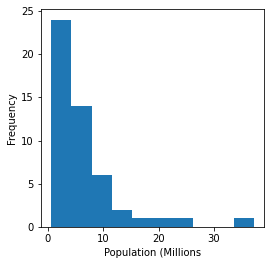

In [15]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (Millions')


#### Grafico de Densidad

Densidad de la tasa de homicidios estatales

Text(0.5, 0, 'Murder Rate (per 100,000)')

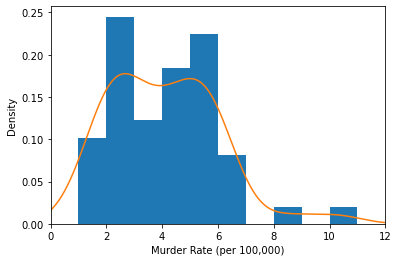

In [16]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax) # argumento opcional de eje ax, lo que hace que el grafico se agregue a otro grafico
ax.set_xlabel ('Murder Rate (per 100,000)')


### Explorando datos binarios y categoricos

In [17]:
#importando los datos
#Porcentaje de retrasos de vuelos causados por el retraso en el aereopueto Dallas/Fort
dfw = pd.read_csv('./data/dfw_airline.csv')
print(dfw.head())


    Carrier      ATC   Weather  Security    Inbound
0  64263.16  84856.5  11235.42    343.15  118427.82


Text(0, 0.5, 'Count')

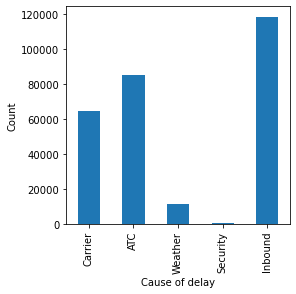

In [18]:
#Retrasos en el areopuerto Dallas/Fort por año, y sus diferentes causas
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

### Correlación

In [19]:
# correlación entre los rendimientos diarios para acciones de telecomunicaciones 
# desde julio de 2012 hasta junio de 2015
# importamos los datos

sp500_sym = pd.read_csv('./data/sp500_sectors.csv') # Informacion de diferentes sectores
sp500_px = pd.read_csv('./data/sp500_data.csv') # acciones de los diferentes sectores

sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [20]:
# determinamos los simbolos que representan las telecomunicaciones
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecomSymbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [21]:
sp500_px.columns

Index(['Unnamed: 0', 'ADS', 'CA', 'MSFT', 'RHT', 'CTSH', 'CSC', 'EMC', 'IBM',
       'XRX',
       ...
       'WAT', 'ALXN', 'AMGN', 'BXLT', 'BIIB', 'CELG', 'GILD', 'REGN', 'VRTX',
       'HSIC'],
      dtype='object', length=518)

In [22]:
# Filtramos los datos de acciones por fecha desde julio de 2012 a junio de 2015
telecom = sp500_px.loc[sp500_px['Unnamed: 0'] >= '2012-07-01', telecomSymbols]
telecom.corr()
telecom

,T,CTL,FTR,VZ,LVLT
4893,0.422496,0.140847,0.070879,0.554180,-0.519998
4894,-0.177448,0.066280,0.070879,-0.025976,-0.049999
4895,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
4896,0.342205,0.132563,0.007875,0.140106,-0.359999
4897,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
5642,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
5643,-0.256586,0.039999,-0.070000,0.029650,-0.739998
5644,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
5645,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


Nos enfocamos en las acciones de las principales bolsas

In [23]:
etfs = sp500_px.loc[sp500_px['Unnamed: 0'] > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

           XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
4893 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
4894  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
4895  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
4896 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
4897  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

           IWM       XLE       XLY       XLU       XLB       XTL       XLV  \
4893  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076 -0.009529   
4894  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000  0.000000   
4895 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072 -0.142955   
4896 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213 -0.095304   
4897 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000  0.352630   

           XLP       XLF       XLK  
4893  0.313499  0.018999  0.075668  
4894  

Trazamos la correlacion como mapa de calor con la libreria seaborn ya que la matriz de correlacion en esta caso es muy confusa

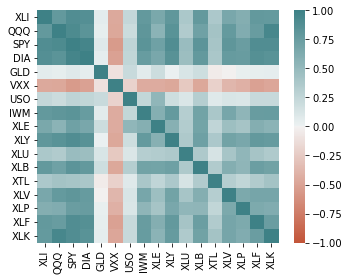

In [24]:
import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 200, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

### Scatterplot

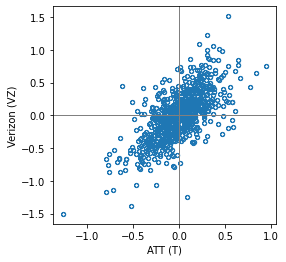

In [25]:
# Grafico de Correlacion entre las devoluciones diarias para ATT y Verizon

ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker= '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

Los registros tienen una relación positiva: mientras se agrupan alrededor de cero, en la mayoría
de días, las acciones suben o bajan en tándem (cuadrantes superior derecho e inferior izquierdo).
Hay menos días en los que una acción baja significativamente mientras que la otra acción
sube, o viceversa (cuadrantes inferior derecho y superior izquierdo).


### Grafico de Contenedor Exagonal y de Contorno

In [26]:
# Dataset kc_tax contiene los valores de la tasa de impuesto para propiedades residenciales
# en el condado de King, Washington. Eliminamos datos costosos para centrarnos el la parte
# principal de los datos
kc_tax = pd.read_csv('./data/kc_tax.csv')
kc_tax.columns   #nombre de las columnas del dataset

Index(['TaxAssessedValue', 'SqFtTotLiving', 'ZipCode'], dtype='object')

In [27]:
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [28]:
# Datos costosos: Residencias costosas, pequeñas o muy grandes
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                    (kc_tax.SqFtTotLiving > 100) &
                    (kc_tax.ZipCode > 3500), :]

print(kc_tax0.shape)

(417629, 3)


GRAFICO DE CONTENEDOR HEXAGONAL

Text(0, 0.5, 'Valor de tasa Fiscal')

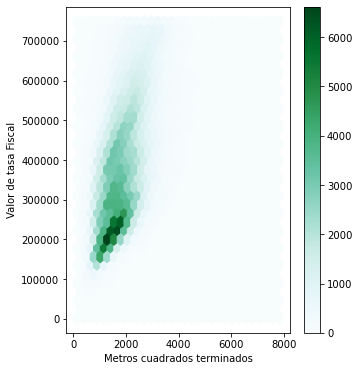

In [29]:
# Grafico de contenedor hexagonal
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30,
                        sharex=False, figsize=(5, 6))

ax.set_xlabel('Metros cuadrados terminados')
ax.set_ylabel('Valor de tasa Fiscal')

Diagrama de binning hexagonal de la relacion entre los metros cuadrados terminados y la tasa fiscal para viviendad en el condado King. Este tipo de grafico permite agrupar los registros en contenedores hexagonales donde la intensidad del color indica el numero de registros en ese contenedor. Ayuda a que la visualizacion sea mejor

GRAFICO DE CONTORNO

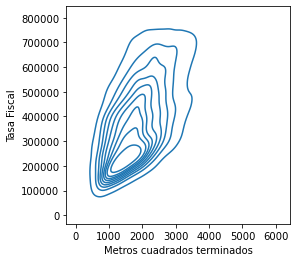

In [30]:
#Grafico de contorno entre la tasa fiscal y los metros cuadrados terminados de las viviendas
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax = ax)
ax.set_xlabel('Metros cuadrados terminados')
ax.set_ylabel('Tasa Fiscal')
plt.show()

### Tabla de Contingencia

Tabla de contingencia entre un prestamo personal y el resultado de dicho prestamo

In [33]:
# cargamos los datos
lc_loans = pd.read_csv('./data/lc_loans.csv')
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [34]:
# creamos una mejor visualizacion a traves de una tabla de contingencia
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True) 
print(crosstab)
#margins=True realiza la suma de las columnas y las filas

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


La calificacion del prestamos va de A a G. Los resultados son: impago(charged off), al corriente(current), pagado(Fully paid) y con retraso(late)

Ahora vamos a mostrar la tabla de recuento y el porcentaje de filas

In [38]:
df = crosstab.copy().loc['A':'G',:] #copy() crea una copia de la tabla ignorando la suma de las columnas
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0) #dividimos las filas con la suma de las filas
df['All'] =df['All']/sum(df['All']) #dividimos la columna All por la suma de sus valores
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


los prestamos de alta calificacion tienen un porcentaje de morosidad/impago muy bajo en comparacion con prestamos de menor calificacion.

### Datos Numericos y Categoricos

Vamos a comparar como el porcentaje de retrasos en los vuelos varia segun las compañias aereas.
Para ello, crearemos un grafico de caja para cada estado que muestre el porcentaje de vuelos en un mes que se retrasaron cuando el retraso estaba bajo el control aereo.

In [39]:
#los graficos de cajas de una columna pueden ser agrupados por una columna diferente
# cargamos los datos
airline_stats = pd.read_csv('./data/airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


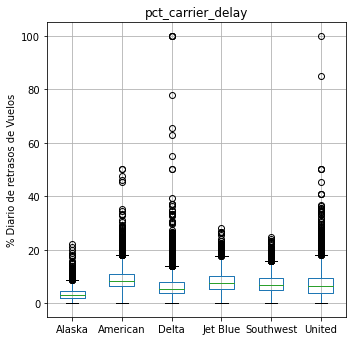

In [40]:
#creamos el boxplot
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(5,5))
ax.set_xlabel('')
ax.set_ylabel('% Diario de retrasos de Vuelos')
plt.suptitle('')

plt.tight_layout()
plt.show()

Alaska destaca por tener el menor numero de retrasos, mientras que American tiene el mayor numero de retrasos: el cuartil inferior de American es mayor que el cuartil superior de Alaska

Otra manera alternativa de visualizar lo anterior es a traves de un Grafico de Violin.

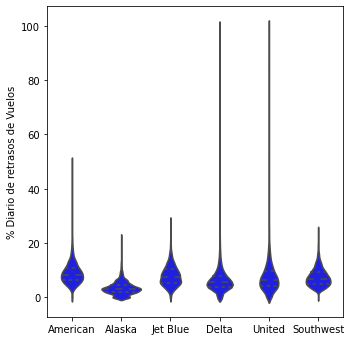

In [41]:
#Grafico de Violin
fig, ax = plt.subplots(figsize=(5,5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', ax=ax,
                inner='quartile', color='blue')
ax.set_xlabel('')
ax.set_ylabel('% Diario de retrasos de Vuelos')
plt.suptitle('')

plt.tight_layout()
plt.show()

### Vizualizando Multiples Variables

Ya observamos que en la relacion entre los pies cuadrados terminados por casa y sus impuestos, hay un grupo de casas que tienen impuestos mas altos por pie cuadrado. Ahora, en la siguiente grafica se muestra el efecto de la ubicacion trazando los datos para un conjunto de codigos postales

In [43]:
#Grafica del impuesto en funcion de los pies cuadrados terminado por codigo postal.
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


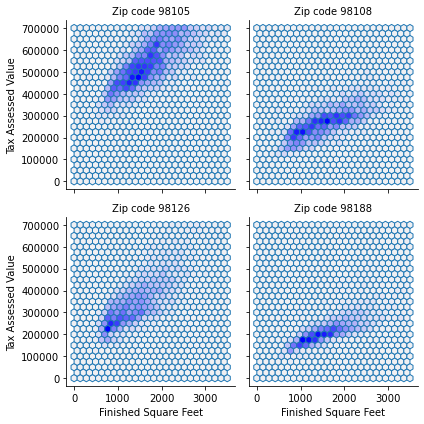

In [46]:
def hexbin(x, y, **kwargs):
    cmap = sns.light_palette(color='blue', as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

#use col y col_wrap para especificar las variables condicionales
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2) 

#el metodo map llama la funcion hexbin con un subconjunto del conjunto original para los
#diferentes codigos postales. extent= define los limites de los ejes X y Y
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

El valor de impuestos es mucho mayor en algunos codigos postales (98195, 98126) que en otros (98108, 98188) lo cual se evidencia en los conglomerados que muestra la grafica